# COMP SCI 1015 IAP - Coding Assignment 4 - Wordle

# Introduction

In this assignment, you will recreate the popular **Wordle** game using Python and tkinter. Wordle is a web-based word game created and developed by Welsh software engineer Josh Wardle. Players have six attempts to guess a five-letter word, with feedback given for each guess in the form of colored tiles indicating when letters match or occupy the correct position.

If you have never played Wordle, you can find the rules and try the game here: https://www.nytimes.com/games/wordle/index.html

## Specifications
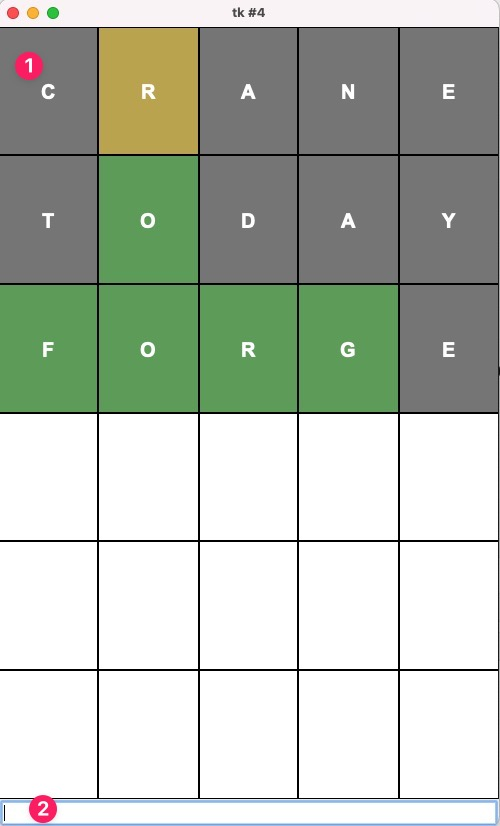

The GUI contains two main components
* (1) a grid showing the player's guesses. green indicates that letter is correct and in the correct position, yellow means it is in the answer but not in the right position, while gray indicates it is not in the answer at all.
* (2) a text entry where the player can input guesses.

We also provide two files:
* `wordle_words.txt` contains the puzzle words that are used by the wordle game
* `wordle_valid_guess.txt` contains the words that are viewed as valid guesses from the player

Your program must have the following functionality:
* Automatically choose a word from the `wordle_words.txt` as a puzzle
* Check if the player's guess is valid, i.e. the word should appear on the list in `wordle_valid_guess.txt`
* Display the grid correctly
* Inform the player they win or lose the game

## Rubric
<font color='red'>You must implement your program based on the code below. Otherwise you will receive 0 marks!</font>
* Program functionality meets specifications
  * Choose puzzle (8 marks)
  * Check guess (16 marks)
  * Display grid (40 marks)
  * Game result (16 marks)
* Comments (20 marks)
  * The comments should clearly state the purpose of every *code block* you have.
  * You should NOT be commenting every line at this point in the semester. If you are not commenting for each *code block* you will lose marks.

You earn **10 bonus marks** if players are able to play multiple rounds of the game. For example, after the user fails to solve the puzzle after six incorrect guesses, the application should clear all the previous guesses and start the next new puzzle.

---

## Code

<!-- BEGIN QUESTION -->



In [7]:
import tkinter as tk
from tkinter import messagebox
import random
import json

WORD_LENGTH = 5

wordle={ # the main data structure that store game information
    'num_guess' : 0,    # number of current guesses
    'puzzle' : '',      # the puzzle
    'valid_guess' : []  # list of valid guesses 
}
labels = [] # The grid consists of 6 x 5 label widgets

# Game started. Insert a list of valid guesses for the puzzle.
def init_wordle(f1 = 'wordle_words.txt', f2 = 'wordle_valid_guess.txt'):
    '''Initialise the game. Pick the puzzle and initilaise a list of valid guesses'''
    global wordle
    with open(f1, 'r') as file:
        words = file.read().splitlines()
        wordle['puzzle'] = random.choice(words)

    with open(f2, 'r') as file:
        wordle['valid_guess'] = file.read().splitlines()

# Check the guess's validity
def valid_guess(guess):
    '''Check if the guess is valid'''
    global wordle
    return guess in wordle['valid_guess']

# Verify the guess
def correct_guess(guess):
    '''Check if the guess is correct'''
    global wordle
    return guess == wordle['puzzle']

# Update the grid according to correct and erroneous letters
def update_grid():
    '''Update the grid based on the number of correct and incorrect letters'''
    global wordle, labels

    puzzle = wordle['puzzle']
    guess = entry.get()

    correct_letters = 0
    correct_positions = 0

    for i in range(WORD_LENGTH):
        letter = guess[i]
        if letter == puzzle[i]:
            labels[wordle['num_guess']][i].config(text=letter, bg='green')
            correct_positions += 1
        elif letter in puzzle:
            labels[wordle['num_guess']][i].config(text=letter, bg='yellow')
            correct_letters += 1
        else:
            labels[wordle['num_guess']][i].config(text=letter, bg='gray')

    if correct_positions == WORD_LENGTH:
        messagebox.showinfo("Congratulations", "You won!")
        restart_game()
    elif wordle['num_guess'] == 5:
        messagebox.showinfo("Game Over", f"You lost! The puzzle word was: {wordle['puzzle']}")
        restart_game()
    else:
        wordle['num_guess'] += 1

# Compare the player's prediction with the puzzle
def on_enter(event):
    '''main logic of the game, compare the player's guess against the puzzle'''
    global wordle, labels
    
    # INSERT YOUR CODE BELOW
    guess = entry.get()

    if valid_guess(guess):
        if correct_guess(guess):
            messagebox.showinfo("Congratulations", "You won!")
            restart_game()
        else:
            update_grid()
    else:
        messagebox.showerror("Invalid Guess", "Please enter a valid guess.")

# Restart the game after the puzzle is finished
def restart_game():
    '''Restart the game and select a different word'''
    global wordle, labels

    wordle['num_guess'] = 0
    init_wordle()

    for row in labels:
        for label in row:
            label.config(bg='white')

    entry.delete(0, tk.END)

# === MAIN PROGRAM ===
# Initliase the game and UI widgets, you do not need to modify the code below

init_wordle()

win = tk.Tk()
win.geometry("500x800")

# The grid consists of 6 x 5 label widgets
for r in range(6):
    tk.Grid.rowconfigure(win, r, weight=1)
    l = []
    for c in range(5):
        tk.Grid.columnconfigure(win, c, weight=1)
        lab = tk.Label(text='', font=("Arial Bold", 20), fg='white', bg='white',  borderwidth=1, relief="solid")
        lab.grid(row=r, column=c, sticky='nesw')
        l.append(lab)
    labels.append(l)
        
entry = tk.Entry(width=30)
entry.grid(row=6, columnspan=5, sticky='nsew')
entry.bind('<Return>', on_enter)

win.mainloop()

<!-- END QUESTION -->

